<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures as cf

#Some plot settings
import plot_functions.plot_settings

In [2]:
%run plot_functions/plot_settings.py

# Heat conduction in 1D: Cartesian, cylindrical, spherical coordinates

## Governing differential equation

The heat conduction equation in isotropic media reads:

$$
    0 = \varrho c_p \frac{\partial T}{\partial t} - \text{div}\,( \lambda \,\text{grad}\,T )
$$

With the standard units

$[\varrho] = \text{kg}\,\text{m}^{-3}$

$[c_p] = \text{J}\,\text{kg}^{-1}\,\text{K}^{-1}$

$[\lambda] = \text{W}\,\text{m}^{-1}\,\text{K}^{-1}$


## Weak form

The temperature field can have (the essential/Dirichlet) boundary conditions in the form:

$$
    T = \bar{T}\ \forall \mathbf{x} \in \partial \Omega_\mathrm{D}
$$

We now introduce a test function $\eta$ which vanishes where the temperature is given

$$
    \eta = 0\ \forall \mathbf{x} \in \partial \Omega_\mathrm{D}
$$

and construct the weak form (using integration by parts):

\begin{align}
   0 &= \int \limits_\Omega \eta \left[\varrho c_p \dot{T} - \nabla \cdot (\lambda \nabla T)  \right] \text{d}\Omega
   \
   &= \int \limits_\Omega \left[\eta \varrho c_p \dot{T} - \nabla \cdot \left( \eta \lambda \nabla T \right) + \nabla \eta \cdot \lambda \nabla T \right] \, \text{d}\Omega
   \
   &= \int \limits_\Omega \left[\eta \varrho c_p \dot{T} + \nabla \eta \cdot \lambda \nabla T \right] \, \text{d}\Omega - \int \limits_{\Omega_\text{N}} \eta q_n \,\text{d}\Gamma
\end{align}

where the natural/Neumann boundary conditions have appeared and $q_n > 0$ for heat input into the domain.

## Symmetries

### 1D Cartesian

Limiting to a 1D problem of heat conduction along $x \in [x_\text{in},x_\text{out}]$ through a constant cross section $A$ we obtain with $\text{d}\Omega = A\text{d}x$:

\begin{align}
0 &= \int \limits^{x_\text{out}}_{x_\text{in}} \left[\eta \varrho c_p \dot{T} + \eta_{,x} \cdot \lambda T_{,x} \right] \, A \,\text{d}x - [ \eta q_n A ]^{x_\text{out}}_{x_\text{in}}
\end{align}

Usually, the constant $A$ does not explicitly appear. We keep it here for generalization. The discrete form reads:

$$
    \int \limits^{x_\text{out}}_{x_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, A\, \text{d}x\ {}^{t+\Delta t}\hat{T}_k = q_n|_{x_\text{out}} A \delta_{n_\text{n}i} - q_n|_{x_\text{in}} A \delta_{i0} +  \int \limits^{x_\text{out}}_{x_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, A\,\text{d}x\ {}^t\hat{T}_{k}
$$

The nodal flow rates are given in W. If $A$ remains implicit, they are given in W$\,$m$^{-2}$ (heat power per unit cross section). Keeping $A$ allows to write

$$
    \int \limits^{x_\text{out}}_{x_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, A\, \text{d}x\ {}^{t+\Delta t}\hat{T}_k = P_n|_{x_\text{out}} \delta_{n_\text{n}i} - P_n|_{x_\text{in}} \delta_{i0} +  \int \limits^{x_\text{out}}_{x_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, A\,\text{d}x\ {}^t\hat{T}_{k}
$$

### 1D cylindrical

Limiting to a 1D problem of heat conduction along a radial coordinate $r \in [r_\text{in},r_\text{out}]$ through a cylindrical cross section $A = 2\pi r h$ we obtain with $\text{d}\Omega = 2\pi r h \,\text{d}r$:

\begin{align}
0 &= \int \limits^{r_\text{out}}_{r_\text{in}} \left[\eta \varrho c_p \dot{T} + \eta_{,r} \cdot \lambda T_{,r} \right] \, 2\pi r h \,\text{d}r - [ \eta q_n 2\pi r h ]^{r_\text{out}}_{r_\text{in}}
\end{align}

Usually, the constant $h$ does not explicitly appear. We keep it here for generalization. The discrete form reads:

$$
    \int \limits^{r_\text{out}}_{r_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, 2 \pi r h\, \text{d}r\ {}^{t+\Delta t}\hat{T}_k = q_n|_{r_\text{out}} 2\pi r_\text{out} h \delta_{n_\text{n}i} - q_n|_{r_\text{in}} 2\pi r_\text{in} h \delta_{i0} +  \int \limits^{r_\text{out}}_{r_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, 2\pi r h \,\text{d}r\ {}^t\hat{T}_{k}
$$

The nodal flow rates are given in W. If $h$ remains implicit, they are given in W$\,$m$^{-1}$ (heat power per unit height of the cylindrical domain). Keeping $2\pi h$ in the formulation allows to write:

$$
    \int \limits^{r_\text{out}}_{r_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, 2 \pi r h\, \text{d}r\ {}^{t+\Delta t}\hat{T}_k = P_n|_{r_\text{out}}  \delta_{n_\text{n}i} - P_n|_{r_\text{in}} \delta_{i0} +  \int \limits^{r_\text{out}}_{r_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, 2\pi r h \,\text{d}r\ {}^t\hat{T}_{k}
$$

### 1D spherical

Limiting to a 1D problem of heat conduction along a radial coordinate $r \in [r_\text{in},r_\text{out}]$ through a spherical cross section $A = 4\pi r^2$ we obtain with $\text{d}\Omega = 4\pi r^2 \,\text{d}r$:

\begin{align}
0 &= \int \limits^{r_\text{out}}_{r_\text{in}} \left[\eta \varrho c_p \dot{T} + \eta_{,r} \cdot \lambda T_{,r} \right] \, 4\pi r^2 \,\text{d}r - [ \eta q_n 4\pi r^2 ]^{r_\text{out}}_{r_\text{in}}
\end{align}

The discrete form reads:

$$
    \int \limits^{r_\text{out}}_{r_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, 4\pi r^2\, \text{d}r\ {}^{t+\Delta t}\hat{T}_k = q_n|_{r_\text{out}} 4\pi r_\text{out}^2 \delta_{n_\text{n}i} - q_n|_{r_\text{in}} 4\pi r_\text{in}^2 \delta_{i0} +  \int \limits^{r_\text{out}}_{r_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, 4\pi r^2 \,\text{d}r\ {}^t\hat{T}_{k}
$$

The nodal flow rates are given in W. Keeping $4\pi$ in the formulation allows to write:
$$
    \int \limits^{r_\text{out}}_{r_\text{in}} \left[ N_i \frac{\varrho c_p}{\Delta t} N_k + \nabla N_i \lambda \nabla N_k \right] \, 4\pi r^2\, \text{d}r\ {}^{t+\Delta t}\hat{T}_k = P_n|_{r_\text{out}} \delta_{n_\text{n}i} - P_n|_{r_\text{in}} \delta_{i0} +  \int \limits^{r_\text{out}}_{r_\text{in}} N_i \frac{\varrho c_p}{\Delta t} N_k \, 4\pi r^2 \,\text{d}r\ {}^t\hat{T}_{k}
$$

### Implementation

Due to the symmetries, the gradient operators remain identical. The domain integration is performed one-dimensionally over a generalized coordinate $x$ with a symmetry class-dependent multiplier 

$$
    \int (\cdot)\,\text{d}\Omega = \int (\cdot)\,A_\text{sym}\text{d}x
$$

with

$$
    A_\text{sym} = \begin{cases}
        A & \text{1D Cartesian}\
        2\pi x h & \text{1D cylindrical}\
        4\pi x^2 & \text{1D spherical}
    \end{cases}
$$

Neumann boundary conditions can be given as total heating powers or heat fluxes with 

$$
P_n|_{x_\text{b}} = A_\text{sym}|_{x_\text{b}} q_n|_{x_\text{b}}
$$

By setting $A = 1\,\text{m}^2$ or $h = 1\,\text{m}$ one can easily transition to quantities normalized per unit area or length.

## Finite elements in 1D

We have a soil column of height $H$ on top of the bed rock at $z=0$.

We first create an element class. An element knows the number of nodes it has, their IDs in the global node vector, and the coordinates of its nodes. Linear elements have 2 nodes and 2 quadrature points, quadratic elements 3 nodes and 3 quadrature points. The natural coordinates of the element run from -1 to 1, and the quadrature points and weights are directly taken from Numpy.

In [3]:
#element class
class line_element():#local coordinates go from -1 to 1
    #takes number of nodes, global nodal coordinates, global node ids
    def __init__(self, nnodes=2, ncoords=[0.,1.], nids=[0,1]):
        self.__nnodes = nnodes
        if (len(ncoords) != self.__nnodes):
            raise Exception("Number of coordinates does not match number \
                            of nodes of element (%i vs of %i)" %(self.__nnodes,len(ncoords)))
        else:
            self.__coords = np.array(ncoords)
        
        self.__natural_coords = (self.__coords-self.__coords[0])/(self.__coords[-1]-self.__coords[0])*2. - 1.
        
        if (len(nids) != self.__nnodes):
            raise Exception("Number of node IDs does not match number \
                            of nodes of element (%i vs of %i)" %(self.__nnodes,len(nids)))
        else:
            self.__global_ids = np.array(nids)
        self.__quad_degree = self.__nnodes
        self.__quad_points, self.__quad_weights = np.polynomial.legendre.leggauss(self.__quad_degree)
                

Next, we wish to generate a one-dimensional mesh by specifying the length of a line, the number of elements into which the mesh is to be split, and the number of nodes per element.

In [4]:
def number_of_nodes(nelems,nodes_per_elem):
    return nelems*nodes_per_elem - (nelems - 1)

def generate_mesh(domain_start,domain_length,nelems,nodes_per_elem):
    nn = number_of_nodes(nelems,nodes_per_elem)
    #coordinate vector of global nodes
    global_nodal_coordinates = np.linspace(domain_start,domain_start+domain_length,nn)
    global_solution = np.array([0.]*nn)
    
    #generate elements
    element_vector = []
    for i in range(nelems):
        node_start = (nodes_per_elem-1)*i
        element_vector.append(
            line_element(nodes_per_elem,
                         global_nodal_coordinates[node_start:node_start+nodes_per_elem],
                         list(range(node_start,node_start+nodes_per_elem))))
        
    return global_nodal_coordinates, element_vector, global_solution

## Shape functions in 1D

As in exercise 06, we allow linear and higher-order shape functions.

In [5]:
#N
def shape_function(element_order,xi):
    if (element_order == 2): #-1,1
            return np.array([(1.-xi)/2., (1.+xi)/2.])
    elif (element_order == 3): #-1, 0, 1
            return np.array([(xi - 1.)*xi/2., (1-xi)*(1+xi), (1+xi)*xi/2.])
#dN_dxi
def dshape_function_dxi(element_order,xi):
    if (element_order == 2): #-1,1
        return np.array([-0.5*xi/xi, 0.5*xi/xi])  #xi only later for plotting dimensions
    elif (element_order == 3):#-1,0,1
        return np.array([xi - 0.5,-2.*xi,xi + 0.5])

#dz_dxi
def element_jacobian(element,xi):
    element_order = element._line_element__nnodes
    Jacobian = 0.
    Jacobian += dshape_function_dxi(element_order,xi).dot(element._line_element__coords)
    return Jacobian

#dN_dz
def grad_shape_function(element,xi):
    element_order = element._line_element__nnodes
    Jac = element_jacobian(element,xi)
    return dshape_function_dxi(element_order,xi)/Jac


## Local assember

In [6]:
def density(r):
    rho = 2000. #kg/m³
    return rho

def heat_conductivity(r):
    lam = 2.0 #W/m/K
    return lam

def specific_heat_capacity(r):
    cp = 2000. #J/kg/K
    return cp

def cross_section(): #cross section in 1D Cartesian examples
    A = 1 #m²
    return A

def height(): #height in 1D cylindrical examples
    h = 1 #m
    return h

In [7]:
def local_assembler(elem,dt,prev_sol,symm='Cartesian',mass_lumping='False'):
    element_order = elem._line_element__nnodes
    K_loc = np.zeros((element_order,element_order))
    b_loc = np.zeros(element_order)
    x_nodes = elem._line_element__coords
    for i in range(elem._line_element__quad_degree):
        #local integration point coordinate
        xi = elem._line_element__quad_points[i]
        #shape function
        N = shape_function(element_order,xi)
        #gradient of shape function
        dN_dX = grad_shape_function(elem,xi)
        #determinant of Jacobian
        detJ = np.abs(element_jacobian(elem,xi))
        #integration weight
        w = elem._line_element__quad_weights[i]
        
        #global integration point coordinate (for spatially varying properties and symmetries)
        x_glob = np.dot(N,x_nodes)
        
        rho = density(x_glob)
        lam = heat_conductivity(x_glob)
        cp = specific_heat_capacity(x_glob)
        
        Asymm = 1
        if (symm == 'Cartesian'):
            Asymm = cross_section()
        elif (symm == 'Cylindrical'):
            Asymm = 2.*np.pi*height()*x_glob
        elif (symm == 'Spherical'):
            Asymm = 4.*np.pi*x_glob*x_glob
        
        #assembly of local stiffness matrix
        M_loc = np.outer(N,N) * rho * cp / dt
        if (mass_lumping):
            M_loc = np.diag(M_loc.sum(0)) #diagonal of column sum
           
        K_loc += (np.outer(dN_dX,dN_dX) * lam + M_loc)* w * detJ * Asymm
        
        #assembly of local RHS
        #p_prev = np.dot(N,prev_sol)#pressure in integration point
        #b_loc += N * p_prev/dt * w * detJ #this solution would be diffusive, because mass lumping would be only on the RHS
        b_loc += np.dot(M_loc,prev_sol) * w * detJ * Asymm
    return K_loc,b_loc

## Global assembly

Now we can construct the global matrix system $\mathbf{K}\mathbf{u} = \mathbf{f}$ or $\mathbf{A}\mathbf{x}=\mathbf{b}$ (see lecture script).

In [8]:
def global_assembler(nodes,elements,solution,dt,symm='Cartesian',mass_lumping=False):
    K_glob = np.zeros((len(nodes),len(nodes)))
    b_glob = np.zeros(len(nodes))
    for i,elem in enumerate(elements):
        start_id = elem._line_element__global_ids[0]
        end_id = elem._line_element__global_ids[-1]
        K_i, b_i = local_assembler(elem,dt,solution[start_id:end_id+1],symm,mass_lumping)
        K_glob[start_id:end_id+1,start_id:end_id+1] += K_i
        b_glob[start_id:end_id+1] += b_i
    return K_glob, b_glob

## Application of boundary conditions

First we apply flux boundary conditions

In [9]:
def apply_Neumann_bc(b_glob,node_id,value):
    b_glob[node_id] += value
    return b_glob

Then we apply Dirichlet bc

In [10]:
def apply_Dirichlet_bc(K_glob,b_glob,node_id,value):
    K_glob[node_id,:] = 0.# = K_glob[:,node_id] = 0.
    K_glob[node_id,node_id] = 1.
    b_glob[node_id] = value
    return K_glob, b_glob

In [11]:
def apply_initial_conditions(solution,T0):
    solution *= 0.
    solution += T0
    return

## Calculation of boundary power from solution

In [12]:
def boundary_flux(elem,sol,symm='Cartesian',side='left'):
    xi = 0
    if side == 'left':
        xi = -1
    elif side == 'right':
        xi = 1
    dN_dX = grad_shape_function(elem,xi)
    q_b = np.dot(dN_dX,sol)*heat_conductivity(elem._line_element__coords[0])
    Asymm = 1
    if (symm == 'Cartesian'):
        Asymm = cross_section()
    elif (symm == 'Cylindrical'):
        Asymm = 2.*np.pi*height()*elem._line_element__coords[0]
    elif (symm == 'Spherical'):
        Asymm = 4.*np.pi*elem._line_element__coords[0]*elem._line_element__coords[0]
    if side == 'left':
        return -q_b * Asymm
    elif side == 'right':
        return q_b*Asymm

In [13]:
def nodal_flow_rate(elem,dt,sol,prev_sol,symm='Cartesian',mass_lumping='False',side='left'):
    element_order = elem._line_element__nnodes
    K_loc = np.zeros((element_order,element_order))
    b_loc = np.zeros(element_order)
    x_nodes = elem._line_element__coords
    for i in range(elem._line_element__quad_degree):
        #local integration point coordinate
        xi = elem._line_element__quad_points[i]
        #shape function
        N = shape_function(element_order,xi)
        #gradient of shape function
        dN_dX = grad_shape_function(elem,xi)
        #determinant of Jacobian
        detJ = np.abs(element_jacobian(elem,xi))
        #integration weight
        w = elem._line_element__quad_weights[i]
        
        #global integration point coordinate (for spatially varying properties and symmetries)
        x_glob = np.dot(N,x_nodes)
        
        rho = density(x_glob)
        lam = heat_conductivity(x_glob)
        cp = specific_heat_capacity(x_glob)
        
        Asymm = 1
        if (symm == 'Cartesian'):
            Asymm = cross_section()
        elif (symm == 'Cylindrical'):
            Asymm = 2.*np.pi*height()*x_glob
        elif (symm == 'Spherical'):
            Asymm = 4.*np.pi*x_glob*x_glob
        
        #assembly of local stiffness matrix
        M_loc = np.outer(N,N) * rho * cp / dt
        if (mass_lumping):
            M_loc = np.diag(M_loc.sum(0)) #diagonal of column sum
           
        K_loc += (np.outer(dN_dX,dN_dX) * lam + M_loc)* w * detJ * Asymm
        
        #assembly of local RHS
        #p_prev = np.dot(N,prev_sol)#pressure in integration point
        #b_loc += N * p_prev/dt * w * detJ #this solution would be diffusive, because mass lumping would be only on the RHS
        b_loc += np.dot(M_loc,prev_sol) * w * detJ * Asymm
    if side == 'left':
        return (np.dot(K_loc,sol) - b_loc)[0]
    elif side == 'right':
        return (np.dot(K_loc,sol) - b_loc)[-1]

## Time loop and problem solution

We now establish the time loop and in each time step perform the global assembly, apply a vanishing traction on the top and constrain the displacement at the bottom to zero.

In [14]:
def time_loop(dt,nodes,elements,solution,symm='Cartesian',mass_lumping=False):
    #Startwerte
    t_end = 366*24*60*60 #s
    absolute_tolerance = 1.e-6
    max_iter = 100
    iteration_counter = np.array([0])
    apply_initial_conditions(solution,293.15)
    y = [solution] #create a list that will hold the solution vectors at all time points
    times = np.array([0.])
    #
    while times[-1]+dt < t_end: #repeat the loop as long as the final time step is below the end point
        times = np.append(times,times[-1]+dt) #here define the next time point as the previous time point plus the time increment dt
        y_old = y[-1] #Starting value for recursive update
        i = 0
        #
        while True:
            K, f = global_assembler(nodes,elements,y[-1],dt,symm,mass_lumping)
            q = 1e2 #W/m²
            P = 1.
            if (symm == 'Cartesian'):
                P = q*cross_section()
            elif (symm == 'Cylindrical'):
                P = q*2.*np.pi*height()*elements[0]._line_element__coords[0]
            elif (symm == 'Spherical'):
                P = q*4.*np.pi*(elements[0]._line_element__coords[0])**2
            f = apply_Neumann_bc(f, 0, P) #heat flux on inner radius
            K, f = apply_Dirichlet_bc(K, f, len(nodes)-1, 293.15) #isothermal outer radius
            
            solution = np.linalg.solve(K,f)
            i += 1
            if (np.abs(np.linalg.norm(solution) - np.linalg.norm(y_old)) < absolute_tolerance or i > max_iter): #if change is below tolerance, stop iterations
                break
            y_old = solution #preparation of next recursion

        y.append(solution) #append the new found solution to the solution vector
        iteration_counter = np.append(iteration_counter,i) #store how much iterations this time step took to converge
    return times, y,iteration_counter

100 W/m² heat input, inner radius 1 m.

In [15]:
#spatial discretization
ri = 1.
H = 20.
nel = 20
n_per_el = 3
nodes,elements,solution=generate_mesh(ri,H,nel,n_per_el)

In [16]:
with cf.ThreadPoolExecutor(max_workers=3) as executor:
    result = executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Cartesian',mass_lumping='False')
    result_cyl = executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Cylindrical',mass_lumping='False')
    result_sph = executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Spherical',mass_lumping='False')
#
times, sols, iters = result.result()
times_cyl, sols_cyl, iters_cyl = result_cyl.result()
times_sph, sols_sph, iters_sph = result_sph.result()

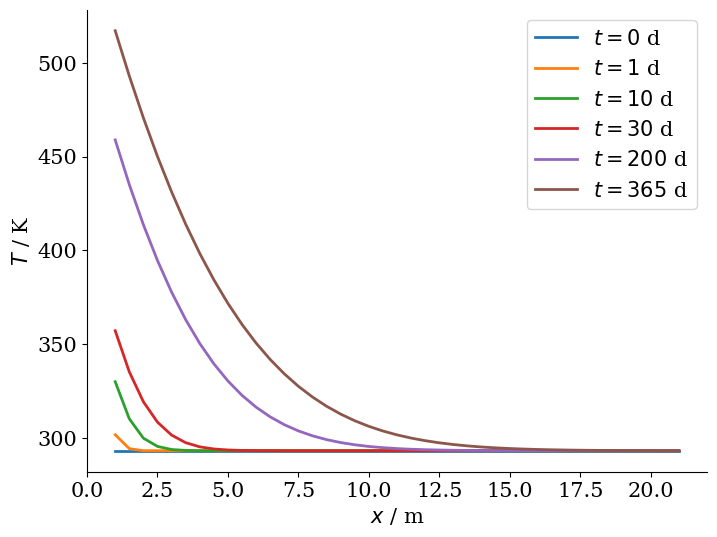

In [17]:
plt.xlabel(r'$x$ / m')
plt.ylabel(r'$T$ / K')
plt.plot(nodes, sols[0], label=r'$t = %i$ d' %(times[0]/60/60))
plt.plot(nodes, sols[1], label=r'$t = %i$ d' %(times[1]/60/60/24))
plt.plot(nodes, sols[10], label=r'$t = %i$ d' %(times[10]/60/60/24))
plt.plot(nodes, sols[30], label=r'$t = %i$ d' %(times[30]/60/60/24))
plt.plot(nodes, sols[200], label=r'$t = %i$ d' %(times[200]/60/60/24))
plt.plot(nodes, sols[-1], label=r'$t = %i$ d' %(times[-1]/60/60/24))
plt.legend();

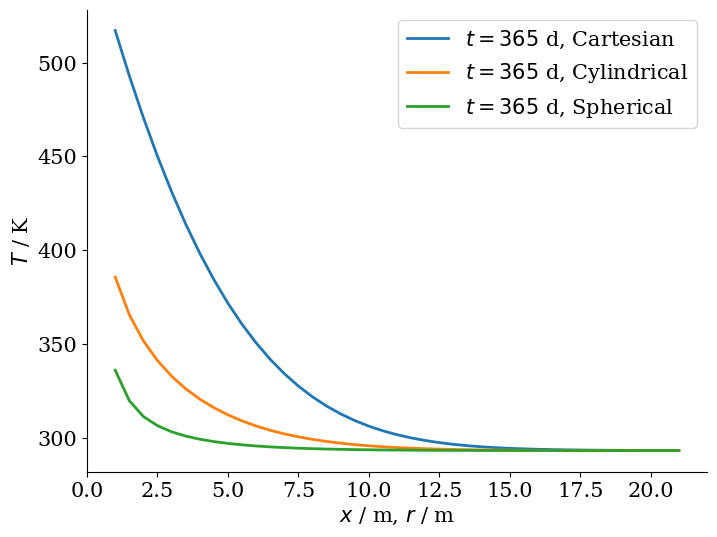

In [18]:
plt.xlabel(r'$x$ / m, $r$ / m')
plt.ylabel(r'$T$ / K')
plt.plot(nodes, sols[-1], label=r'$t = %i$ d, Cartesian' %(times[-1]/60/60/24))
plt.plot(nodes, sols_cyl[-1], label=r'$t = %i$ d, Cylindrical' %(times[-1]/60/60/24))
plt.plot(nodes, sols_sph[-1], label=r'$t = %i$ d, Spherical' %(times[-1]/60/60/24))
plt.legend();

In [19]:
start_id = elements[0]._line_element__global_ids[0]
end_id = elements[0]._line_element__global_ids[-1]
Pcart = []
Pcyl = []
Psph = []
for s in sols:
    Pcart.append(boundary_flux(elements[0],s[start_id:end_id+1],symm='Cartesian',side='left'))
for s in sols_cyl:
    Pcyl.append(boundary_flux(elements[0],s[start_id:end_id+1],symm='Cylindrical',side='left'))
for s in sols_sph:
    Psph.append(boundary_flux(elements[0],s[start_id:end_id+1],symm='Spherical',side='left'))

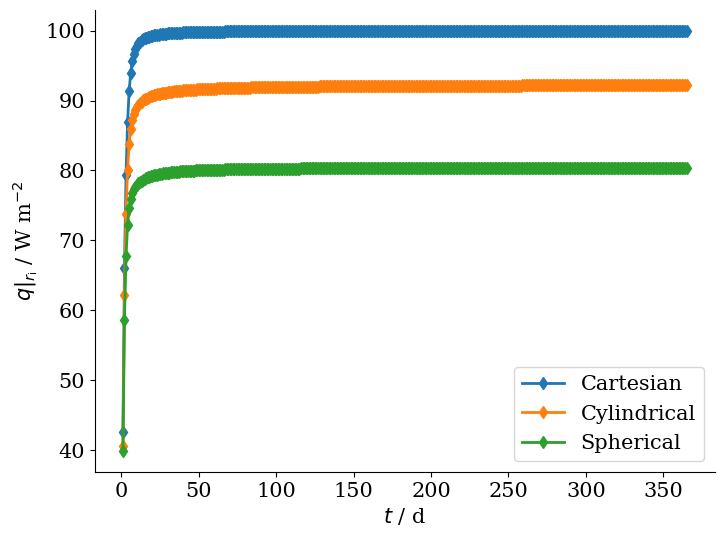

In [20]:
plt.xlabel(r'$t$ / d')
plt.ylabel(r'$q|_{r_\mathrm{i}}$ / W m$^{-2}$')
plt.plot(times[1:]/60/60/24, Pcart[1:], label=r'Cartesian',marker='d')
plt.plot(times[1:]/60/60/24, np.array(Pcyl[1:])/2/np.pi, label=r'Cylindrical',marker='d')
plt.plot(times[1:]/60/60/24, np.array(Psph[1:])/4/np.pi, label=r'Spherical',marker='d')
plt.legend();

The mismatch in the above figure is due to discretization errors and transient effects present when using the element flux-based caculation. With a refined mesh, the curves will tend to a value of 100. Demonstration follows:

In [21]:
#spatial discretization
ri = 1.
H = 20.
nel = 100
n_per_el = 3
nodes_f,elements_f,solution_f=generate_mesh(ri,H,nel,n_per_el)

In [22]:
with cf.ThreadPoolExecutor(max_workers=3) as executor:
    times_f, sols_f, iters_f = (executor.submit(time_loop,24*60*60,nodes_f,elements_f,solution_f,symm='Cartesian',mass_lumping='False')).result()
    times_cyl_f, sols_cyl_f, iters_cyl_f = (executor.submit(time_loop,24*60*60,nodes_f,elements_f,solution_f,symm='Cylindrical',mass_lumping='False')).result()
    times_sph_f, sols_sph_f, iters_sph_f = (executor.submit(time_loop,24*60*60,nodes_f,elements_f,solution_f,symm='Spherical',mass_lumping='False')).result()

In [23]:
start_id = elements_f[0]._line_element__global_ids[0]
end_id = elements_f[0]._line_element__global_ids[-1]
Pcartf = []
Pcylf = []
Psphf = []
for s in sols_f:
    Pcartf.append(boundary_flux(elements_f[0],s[start_id:end_id+1],symm='Cartesian',side='left'))
for s in sols_cyl_f:
    Pcylf.append(boundary_flux(elements_f[0],s[start_id:end_id+1],symm='Cylindrical',side='left'))
for s in sols_sph_f:
    Psphf.append(boundary_flux(elements_f[0],s[start_id:end_id+1],symm='Spherical',side='left'))

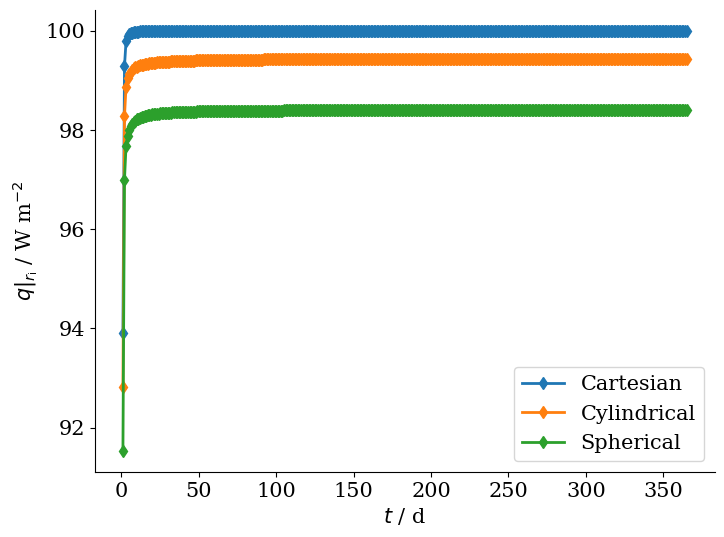

In [24]:
plt.xlabel(r'$t$ / d')
plt.ylabel(r'$q|_{r_\mathrm{i}}$ / W m$^{-2}$')
plt.plot(times[1:]/60/60/24, Pcartf[1:], label=r'Cartesian',marker='d')
plt.plot(times[1:]/60/60/24, np.array(Pcylf[1:])/2/np.pi, label=r'Cylindrical',marker='d')
plt.plot(times[1:]/60/60/24, np.array(Psphf[1:])/4/np.pi, label=r'Spherical',marker='d')
plt.legend();

Let's return to the coarse mesh and look at nodal flow rates instead of element flux calculation.

In [25]:
start_id = elements[0]._line_element__global_ids[0]
end_id = elements[0]._line_element__global_ids[-1]
Pcartn = []
Pcyln = []
Psphn = []
for i in range(len(sols)-1):
    Pcartn.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols[i+1][start_id:end_id+1],sols[i][start_id:end_id+1],symm='Cartesian',mass_lumping='False',side='left'))
for i in range(len(sols_cyl)-1):
    Pcyln.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols_cyl[i+1][start_id:end_id+1],sols_cyl[i][start_id:end_id+1],symm='Cylindrical',mass_lumping='False',side='left'))
for i in range(len(sols_sph)-1):
    Psphn.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols_sph[i+1][start_id:end_id+1],sols_sph[i][start_id:end_id+1],symm='Spherical',mass_lumping='False',side='left'))

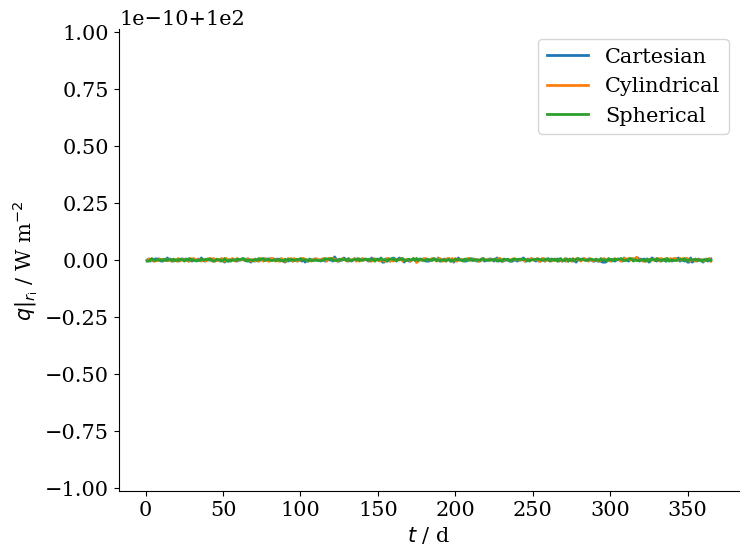

In [26]:
plt.xlabel(r'$t$ / d')
plt.ylabel(r'$q|_{r_\mathrm{i}}$ / W m$^{-2}$')
plt.plot(times[1:]/60/60/24, Pcartn, label=r'Cartesian')
plt.plot(times[1:]/60/60/24, np.array(Pcyln)/2/np.pi, label=r'Cylindrical')
plt.plot(times[1:]/60/60/24, np.array(Psphn)/4/np.pi, label=r'Spherical')
plt.legend();

As we see above, the nodal flow rates are consistent with the boundary condition also for the coarse discretization.

Now we put a cyclic temperature bc on the inside with a frequency of 0.1 per day. 

In [27]:
def cyclic_T(t):
    return 293.15+40*(np.sin(2*np.pi*0.1*t/(60*24*60))+1) #f=10/d

In [28]:
def time_loop(dt,nodes,elements,solution,symm='Cartesian',mass_lumping=False):
    #Startwerte
    t_end = 366*24*60*60 #s
    absolute_tolerance = 1.e-6
    max_iter = 100
    iteration_counter = np.array([0])
    apply_initial_conditions(solution,293.15)
    y = [solution] #create a list that will hold the solution vectors at all time points
    times = np.array([0.])
    #
    while times[-1]+dt < t_end: #repeat the loop as long as the final time step is below the end point
        times = np.append(times,times[-1]+dt) #here define the next time point as the previous time point plus the time increment dt
        y_old = y[-1] #Starting value for recursive update
        i = 0
        #
        while True:
            K, f = global_assembler(nodes,elements,y[-1],dt,symm,mass_lumping)
            K, f = apply_Dirichlet_bc(K, f, 0, cyclic_T(times[-1]+dt))
            K, f = apply_Dirichlet_bc(K, f, len(nodes)-1, 293.15) #isothermal outer radius
            
            solution = np.linalg.solve(K,f)
            i += 1
            if (np.abs(np.linalg.norm(solution) - np.linalg.norm(y_old)) < absolute_tolerance or i > max_iter): #if change is below tolerance, stop iterations
                break
            y_old = solution #preparation of next recursion

        y.append(solution) #append the new found solution to the solution vector
        iteration_counter = np.append(iteration_counter,i) #store how much iterations this time step took to converge
    return times, y,iteration_counter

In [29]:
with cf.ThreadPoolExecutor(max_workers=3) as executor:
    times, sols, iters = (executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Cartesian',mass_lumping='False')).result()
    times_cyl, sols_cyl, iters_cyl = (executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Cylindrical',mass_lumping='False')).result()
    times_sph, sols_sph, iters_sph = (executor.submit(time_loop,24*60*60,nodes,elements,solution,symm='Spherical',mass_lumping='False')).result()

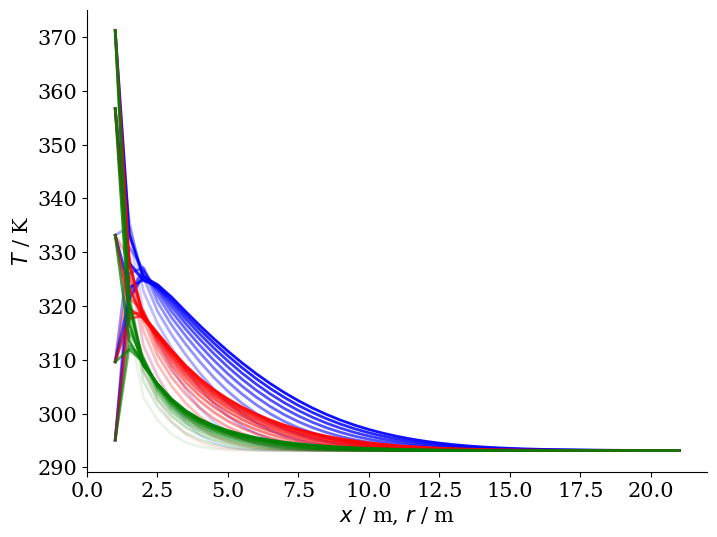

In [30]:
plt.xlabel(r'$x$ / m, $r$ / m')
plt.ylabel(r'$T$ / K')
steps = 31
for i in np.arange(0,len(times),steps):
    plt.plot(nodes, sols[i],color='blue',alpha=(times[i]/times[-1]))
    plt.plot(nodes, sols_cyl[i],color='red',alpha=(times[i]/times[-1]))
    plt.plot(nodes, sols_sph[i],color='green',alpha=(times[i]/times[-1]))
#plt.legend();

In [31]:
start_id = elements[0]._line_element__global_ids[0]
end_id = elements[0]._line_element__global_ids[-1]
Pcartn = []
Pcyln = []
Psphn = []
for i in range(len(sols)-1):
    Pcartn.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols[i+1][start_id:end_id+1],sols[i][start_id:end_id+1],symm='Cartesian',mass_lumping='False'))
for i in range(len(sols)-1):
    Pcyln.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols_cyl[i+1][start_id:end_id+1],sols_cyl[i][start_id:end_id+1],symm='Cylindrical',mass_lumping='False'))
for i in range(len(sols)-1):
    Psphn.append(nodal_flow_rate(elements[0],times[i+1]-times[i],sols_sph[i+1][start_id:end_id+1],sols_sph[i][start_id:end_id+1],symm='Spherical',mass_lumping='False'))

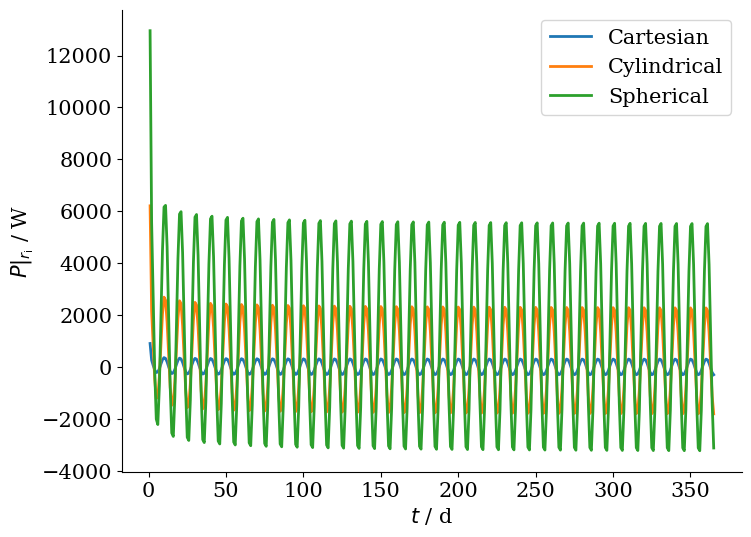

In [32]:
plt.xlabel(r'$t$ / d')
plt.ylabel(r'$P|_{r_\mathrm{i}}$ / W ')
plt.plot(times[1:]/60/60/24, Pcartn, label=r'Cartesian')
plt.plot(times[1:]/60/60/24, Pcyln, label=r'Cylindrical')
plt.plot(times[1:]/60/60/24, Psphn, label=r'Spherical')
plt.legend();